In [110]:
# 读取数据

import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
data= pd.read_csv("E:\Pycharm\Intrusion_Detection\kddcup.data_10_percent.csv",  header=None,names = col_names)
# data.head()
#去重
data_1=data.drop_duplicates()
# print(data_1.info())

In [128]:
#特征选择
#建立X,y
feature_selection=["duration","src_bytes",
    "dst_bytes","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell",
    "num_file_creations",
    "is_guest_login","count","srv_count","serror_rate",
    "rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]
# X_1=data_1[feature_selection]
data_2=data_1.copy()   #一维
##y的处理
data_2['label'][data_2['label']!="normal."]='-1'
data_2['label'][data_2['label']=="normal."]='1'
# y=y_1.as_matrix().astype('int')
# #过采样
# from imblearn.over_sampling import SMOTE     #1有87832个，-1有57754个，不需要采样
# oversampler=SMOTE(random_state=0)
# X_2,y=oversampler.fit_sample(X_1,y_1)
# #标准化
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler().fit(X_1)
# X=scaler.transform(X_1)  #X是ndarray

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [138]:
#正常点和异常点分开
X_out_1=data_2[data_2.label=='-1'][feature_selection]
X_in_1=data_2[data_2.label=='1'][feature_selection]

In [145]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_in_1)
X_in_2=pca.transform(X_in_1)
X_in_2

array([[ 1735.38718093, -1079.56486437],
       [-3228.85883447, -1049.17431114],
       [-2377.85003076, -1048.44257886],
       ..., 
       [-2514.67111092, -1081.22718199],
       [-2515.16068235,  -993.22864997],
       [-2480.76055613, -1065.0383125 ]])

In [146]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_out_1)
X_out_2=pca.transform(X_out_1)
X_out_2

array([[-16712.73462669,   1406.35785618],
       [-16488.73377518,   1215.35755556],
       [-17942.7308083 ,   -249.64450523],
       ..., 
       [-18195.72784062,  -1550.65830697],
       [-18195.72784094,  -1550.65834752],
       [-18195.72784126,  -1550.65838806]])

In [148]:
#标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_in_2)
X_in=scaler.transform(X_in_2) 
X_in#X是ndarray

array([[ 0.04390415, -0.02997339],
       [-0.081688  , -0.02912961],
       [-0.06015804, -0.0291093 ],
       ..., 
       [-0.06361952, -0.03001954],
       [-0.06363191, -0.02757632],
       [-0.06276161, -0.02957007]])

In [149]:
#标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_out_2)
X_out=scaler.transform(X_out_2) 
X_out#X是ndarray

array([[-0.00578327,  0.0168786 ],
       [-0.00570575,  0.01458628],
       [-0.00620889, -0.00299614],
       ..., 
       [-0.00629644, -0.01861044],
       [-0.00629644, -0.01861044],
       [-0.00629644, -0.01861044]])

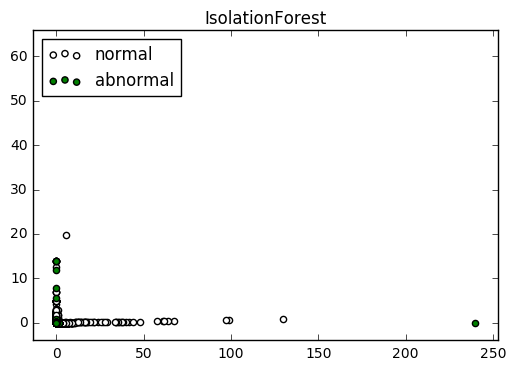

In [150]:
# plot the line, the samples, and the nearest vectors to the plane
# xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))


plt.title("IsolationForest")
# plt.contourf(xx, yy, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_in[:, 0], X_in[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_out[:, 0], X_out[:, 1], c='green',
                 s=20, edgecolor='k')
# c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
#                 s=20, edgecolor='k')
plt.axis('tight')
# plt.xlim((-5, 5))
# plt.ylim((-5, 5))
plt.legend([b1, b2],
           ["normal",
            "abnormal"],
           loc="upper left")
plt.show()

In [52]:
#分类器
from sklearn.ensemble import IsolationForest
clf_1 = IsolationForest()
##模型评估
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_1, X, y, cv=10,scoring='accuracy')
print(scores.mean())
# 查看分类错误样本
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)  #切分样本
clf_1.fit(X_train)
preditions=clf_1.predict(X_test)

from  sklearn.metrics import accuracy_score
acc=accuracy_score(preditions,y_test) #计算accuracy
print(acc)

0.627898508498


0.595473590219


In [61]:
#学习曲线
import numpy as np
from sklearn.model_selection import learning_curve
train_sizes,train_scores,test_scores=learning_curve(estimator=clf_1,
                                X=X_train,y=y_train,
                                train_sizes=np.linspace(0.1,1,10),
                                 cv=10, n_jobs=1,random_state=0,scoring='accuracy')
train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_std=np.std(train_scores,axis=1)
import matplotlib.pyplot as plt
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,
         label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,
         color='blue',alpha=0.25)
plt.plot(train_sizes,test_mean,color='green',linestyle='--',
         marker='s',markersize=5,
         label='balidation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,
         color='green',alpha=0.25)
plt.figure()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

KeyboardInterrupt: 

C:\Users\Jason\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


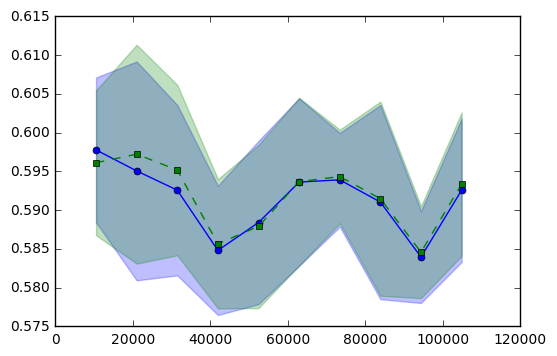

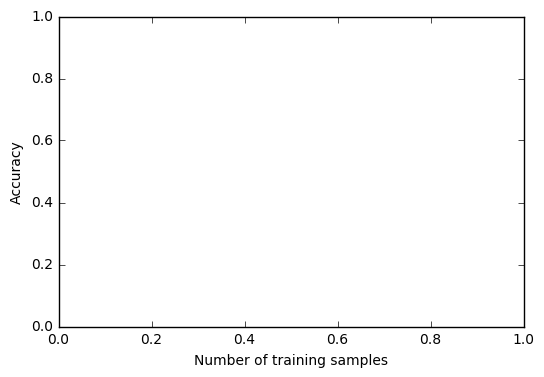

In [60]:
import matplotlib.pyplot as plt
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,
         label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,
         color='blue',alpha=0.25)
plt.plot(train_sizes,test_mean,color='green',linestyle='--',
         marker='s',markersize=5,
         label='balidation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,
         color='green',alpha=0.25)
# plt.grid()
plt.figure()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [55]:
test_mean[-1]

0.59336466590379977

In [ ]:
#ROC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
##建立模型
clf_1 = RandomForestClassifier()

cv = StratifiedKFold(n_splits=10)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for i, (train, test) in enumerate(cv.split(X, y)):

    probas_ = clf_1.fit(X[train], y[train]).predict_proba(X[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1], pos_label=1,scoring='accuracy')
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    # plt.plot(fpr, tpr, lw=1, alpha=0.3,
    #          label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='g',
         label=r'RF Mean ROC (AUC = %0.6f $\pm$ %0.4f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#混淆矩阵
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test,preditions)
class_names=['dos','normal','probe','r2l','u2r']
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

In [ ]:
#分类报告
from sklearn.metrics import classification_report
class_names=['dos','normal','probe','r2l','u2r']
print(classification_report(y_test,preditions,target_names=class_names,digits=4))